In [1]:
import numpy as np
from numpy import random
import time
import pickle
import os
import pathlib
import inspect

from Performance import DDR_Problem_Evaluation
ddr_eva = DDR_Problem_Evaluation()
from OLS import ols_method
from DDR import ddr_method

from SPO import SPO_plus_method
from Figures import regret_and_h2h_figure
regret_h2h = regret_and_h2h_figure()

In [2]:
## Train and test are together
seed = 3
## Train and test are together
start = time.time()
random.seed(seed)
iters = 100
p = 4
d = 10
samples_test = 10000
samples_train = 100
lower = 0
upper = 1
alpha = 1
n_epsilon = 1
mis = 1
thres = samples_test
x_dister = 'uniform'
e_dister = 'normal'
xl = -2
xu = 2
xm = 2
xv = 0.25
#bp = abs(xl)*upper*d
bp = 7

mu = 0.25
lamb = 0.25
data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
grandparent_directory = os.path.dirname(parent_directory)
DataPath = os.path.dirname(grandparent_directory) + '/Data/DDR_Problem_Reproduce_' + data_generation_process +"/"
pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
print("grandparent_directory:", grandparent_directory)
print("DataPath:", DataPath)

grandparent_directory: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Code_MacBook
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data/DDR_Problem_Reproduce_DDR_Data_Generation/


## Generate Data

In [3]:
from Data import data_generation
data_gen = data_generation()
Data = {}
for i in range(iters):
    print("============== iteration = ",i,"==============")
    file_path = DataPath + "iter="+str(i) +"/"
    pathlib.Path(file_path).mkdir(parents=True, exist_ok=True)
    # o uniform, 1 binary, 2 uniform + feature, 3 binary + feature, 4 sparse, 5 012
    W_star = data_gen.generate_truth(lower, upper, p, d, data_generation_process) 
    Data[i] = data_gen.generate_samples(file_path,p, d, samples_test, samples_train, alpha, W_star, n_epsilon, mis, thres, 
                        data_generation_process, x_dister, e_dister, xl, xu, xm, xv, bp) 

============== iteration =  0 ==============
============== iteration =  1 ==============
============== iteration =  2 ==============
============== iteration =  3 ==============
============== iteration =  4 ==============
============== iteration =  5 ==============
============== iteration =  6 ==============
============== iteration =  7 ==============
============== iteration =  8 ==============
============== iteration =  9 ==============
============== iteration =  10 ==============
============== iteration =  11 ==============
============== iteration =  12 ==============
============== iteration =  13 ==============
============== iteration =  14 ==============
============== iteration =  15 ==============
============== iteration =  16 ==============
============== iteration =  17 ==============
============== iteration =  18 ==============
============== iteration =  19 ==============
============== iteration =  20 ==============
============== iteration =  21 =============

## Oracle

In [4]:
cost_Oracle_with_noise_all = {}; cost_Oracle_wo_noise_all = {}
for i in range(iters):
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    cost_Oracle_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(z_test_ori,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    print("iteration = ",i,",c_oracle_without_noise = ",np.nanmean(cost_Oracle_wo_noise_all[i]))
    cost_Oracle_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(z_test_ori,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    print("iteration = ",i,",c_oracle_with_noise = ",np.nanmean(cost_Oracle_with_noise_all[i]))
with open(DataPath+'cost_Oracle_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Oracle_with_noise_all,tf)
with open(DataPath+'cost_Oracle_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Oracle_wo_noise_all,tf)

iteration =  0 ,c_oracle_without_noise =  6.11219825266545
iteration =  0 ,c_oracle_with_noise =  6.116857789943267
iteration =  1 ,c_oracle_without_noise =  6.009674736753086
iteration =  1 ,c_oracle_with_noise =  6.009184529366567
iteration =  2 ,c_oracle_without_noise =  5.920598849589718
iteration =  2 ,c_oracle_with_noise =  5.925849669574091
iteration =  3 ,c_oracle_without_noise =  6.106787023172377
iteration =  3 ,c_oracle_with_noise =  6.109080260795156
iteration =  4 ,c_oracle_without_noise =  5.968111048006341
iteration =  4 ,c_oracle_with_noise =  5.97027032650224
iteration =  5 ,c_oracle_without_noise =  6.083391752254966
iteration =  5 ,c_oracle_with_noise =  6.088259213737695
iteration =  6 ,c_oracle_without_noise =  5.917010608046585
iteration =  6 ,c_oracle_with_noise =  5.918906704354093
iteration =  7 ,c_oracle_without_noise =  6.063916395700509
iteration =  7 ,c_oracle_with_noise =  6.060334899831319
iteration =  8 ,c_oracle_without_noise =  5.976850665384295
iterat

## OLS

In [5]:
ols_method_obj = ols_method()
cost_OLS_with_noise_all = {}; cost_OLS_wo_noise_all = {}
for i in range(iters):
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    W_ols, w0_ols, t_ols, obj_ols = ols_method_obj.ols_solver(file_path,x_train, z_train)
    cost_pred = (W_ols @ x_test.T).T + w0_ols
    cost_OLS_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    print("iteration = ",i,",c_OLS_without_noise = ",np.nanmean(cost_OLS_wo_noise_all[i]))
    cost_OLS_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    print("iteration = ",i,",c_OLS_with_noise = ",np.nanmean(cost_OLS_with_noise_all[i]))
with open(DataPath+'cost_OLS_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_OLS_wo_noise_all,tf)
with open(DataPath+'cost_OLS_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_OLS_with_noise_all,tf)

Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
iteration =  0 ,c_OLS_without_noise =  6.1734991272378785
iteration =  0 ,c_OLS_with_noise =  6.17623295058893
iteration =  1 ,c_OLS_without_noise =  6.078352571057119
iteration =  1 ,c_OLS_with_noise =  6.078740518845465
iteration =  2 ,c_OLS_without_noise =  5.95215121175122
iteration =  2 ,c_OLS_with_noise =  5.957560703918827
iteration =  3 ,c_OLS_without_noise =  6.150375851441591
iteration =  3 ,c_OLS_with_noise =  6.153657350572767
iteration =  4 ,c_OLS_without_noise =  6.011198320499019
iteration =  4 ,c_OLS_with_noise =  6.012151501578712
iteration =  5 ,c_OLS_without_noise =  6.125231122630535
iteration =  5 ,c_OLS_with_noise =  6.13008449694072
iteration =  6 ,c_OLS_without_noise =  5.943831965516432
iteration =  6 ,c_OLS_with_noise =  5.945428110802761
iteration =  7 ,c_OLS_without_noise =  6.178305685129023
iteration =  7 ,c_OLS_with_noise =  6.173609137361809
iteration =  8 ,c_OLS_w

## Lasso

In [6]:
ols_method_obj = ols_method()
cost_Lasso_with_noise_all = {}; cost_Lasso_wo_noise_all = {}
for i in range(iters):
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    W_lasso, w0_lasso, t_lasso = ols_method_obj.lasso_solver(x_train, z_train)
    cost_pred = (W_lasso @ x_test.T).T + w0_lasso
    cost_Lasso_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    print("iteration = ",i,",c_OLS_without_noise = ",np.nanmean(cost_Lasso_wo_noise_all[i]))
    cost_Lasso_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    print("iteration = ",i,",c_OLS_with_noise = ",np.nanmean(cost_Lasso_with_noise_all[i]))
with open(DataPath+'cost_Lasso_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Lasso_wo_noise_all,tf)
with open(DataPath+'cost_Lasso_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Lasso_with_noise_all,tf)

iteration =  0 ,c_OLS_without_noise =  6.174942399999241
iteration =  0 ,c_OLS_with_noise =  6.177634937113554
iteration =  1 ,c_OLS_without_noise =  6.078253376797173
iteration =  1 ,c_OLS_with_noise =  6.078645199391679
iteration =  2 ,c_OLS_without_noise =  5.952166334876471
iteration =  2 ,c_OLS_with_noise =  5.9575851093161365
iteration =  3 ,c_OLS_without_noise =  6.151057682672103
iteration =  3 ,c_OLS_with_noise =  6.154366521171578
iteration =  4 ,c_OLS_without_noise =  6.011623874247317
iteration =  4 ,c_OLS_with_noise =  6.012561879389541
iteration =  5 ,c_OLS_without_noise =  6.125027002255546
iteration =  5 ,c_OLS_with_noise =  6.129863172028214
iteration =  6 ,c_OLS_without_noise =  5.944095326893752
iteration =  6 ,c_OLS_with_noise =  5.945716351018639
iteration =  7 ,c_OLS_without_noise =  6.180759434955121
iteration =  7 ,c_OLS_with_noise =  6.176038105285098
iteration =  8 ,c_OLS_without_noise =  6.033604007061585
iteration =  8 ,c_OLS_with_noise =  6.038363899329505


## Ridge

In [7]:
ols_method_obj = ols_method()
cost_Ridge_with_noise_all = {}; cost_Ridge_wo_noise_all = {}
for i in range(iters):
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    W_ridge, w0_ridge, t_ridge = ols_method_obj.ridge_solver(x_train, z_train)
    cost_pred = (W_ridge @ x_test.T).T + w0_ridge
    cost_Ridge_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    print("iteration = ",i,",c_OLS_without_noise = ",np.nanmean(cost_Ridge_wo_noise_all[i]))
    cost_Ridge_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    print("iteration = ",i,",c_OLS_with_noise = ",np.nanmean(cost_Ridge_with_noise_all[i]))
with open(DataPath+'cost_Ridge_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Ridge_wo_noise_all,tf)
with open(DataPath+'cost_Ridge_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_Ridge_with_noise_all,tf)

iteration =  0 ,c_OLS_without_noise =  6.174834474087651
iteration =  0 ,c_OLS_with_noise =  6.177529743035436
iteration =  1 ,c_OLS_without_noise =  6.078438587835552
iteration =  1 ,c_OLS_with_noise =  6.07884026305909
iteration =  2 ,c_OLS_without_noise =  5.952216864697321
iteration =  2 ,c_OLS_with_noise =  5.957643131881716
iteration =  3 ,c_OLS_without_noise =  6.151281732306785
iteration =  3 ,c_OLS_with_noise =  6.154607353936895
iteration =  4 ,c_OLS_without_noise =  6.011948969561021
iteration =  4 ,c_OLS_with_noise =  6.012875457653276
iteration =  5 ,c_OLS_without_noise =  6.125461518174603
iteration =  5 ,c_OLS_with_noise =  6.130284520981039
iteration =  6 ,c_OLS_without_noise =  5.944166999112452
iteration =  6 ,c_OLS_with_noise =  5.9457862103547505
iteration =  7 ,c_OLS_without_noise =  6.180590046220594
iteration =  7 ,c_OLS_with_noise =  6.175877417890716
iteration =  8 ,c_OLS_without_noise =  6.034121861155918
iteration =  8 ,c_OLS_with_noise =  6.038877286030114
i

## DDR

In [8]:
ddr_method_obj = ddr_method()
mu_all = np.round(np.arange(0.25,0.251,0.1),4)
lamb_all = np.round(np.arange(0.25,0.251,0.1),4)

W_ddr_all = {}; w0_ddr_all = {}; obj_ddr_all = {}
cost_DDR_wo_noise_all = {}; cost_DDR_with_noise_all = {}
for i in range(iters):
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    cost_ddr_avg_tem = np.zeros((len(mu_all),len(lamb_all)))
    for mu_index in range(len(mu_all)):
        mu = mu_all[mu_index]
        for lamb_index in range(len(lamb_all)):
            lamb = lamb_all[lamb_index]
            W_ddr_all[i,mu,lamb], w0_ddr_all[i,mu,lamb] = ddr_method_obj.ddr_solver(x_train, z_train, mu, lamb)
            cost_pred = (W_ddr_all[i,mu,lamb] @ x_test.T).T + w0_ddr_all[i,mu,lamb]
            cost_DDR_wo_noise_all[i,mu,lamb] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
            print("iteration = ",i,",cost_DDR_wo_noise_all = ",np.nanmean(cost_DDR_wo_noise_all[i,mu,lamb]))
            cost_DDR_with_noise_all[i,mu,lamb] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,True)
            print("iteration = ",i,",cost_DDR_with_noise_all = ",np.nanmean(cost_DDR_with_noise_all[i,mu,lamb]))
    # print("iter = ",i,"======")
with open(DataPath+'cost_DDR_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_DDR_wo_noise_all,tf)
with open(DataPath+'cost_DDR_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_DDR_with_noise_all,tf)

iteration =  0 ,cost_DDR_wo_noise_all =  6.171349013642505
iteration =  0 ,cost_DDR_with_noise_all =  6.174127937141397
iteration =  1 ,cost_DDR_wo_noise_all =  6.077365953066308
iteration =  1 ,cost_DDR_with_noise_all =  6.077790777754855
iteration =  2 ,cost_DDR_wo_noise_all =  5.952189522528138
iteration =  2 ,cost_DDR_with_noise_all =  5.957636266558715
iteration =  3 ,cost_DDR_wo_noise_all =  6.1484757329250685
iteration =  3 ,cost_DDR_with_noise_all =  6.15172734340975
iteration =  4 ,cost_DDR_wo_noise_all =  6.01028537151202
iteration =  4 ,cost_DDR_with_noise_all =  6.0112790872129604
iteration =  5 ,cost_DDR_wo_noise_all =  6.124998504292313
iteration =  5 ,cost_DDR_with_noise_all =  6.129847999265795
iteration =  6 ,cost_DDR_wo_noise_all =  5.943338996338911
iteration =  6 ,cost_DDR_with_noise_all =  5.944988142480213
iteration =  7 ,cost_DDR_wo_noise_all =  6.1744186708896285
iteration =  7 ,cost_DDR_with_noise_all =  6.169808060558286
iteration =  8 ,cost_DDR_wo_noise_all =

## SPO Plus

In [9]:
spo_method_obj = SPO_plus_method()
cost_SPO_with_noise_all = {}; cost_SPO_wo_noise_all = {}
for i in range(iters):
    x_test, z_test_ori, z_test, x_train, z_train_ori, z_train, W_star = Data[i]
    y_train_opt = ddr_eva.decision_finder(z_train) #generates the optimal y from the training costs
    W_spo, w0_spo, t_spo = spo_method_obj.spo_solver(x_train, z_train, y_train_opt)
    cost_pred = (W_spo @ x_test.T).T + w0_spo
    cost_SPO_wo_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,False)
    print("iteration = ",i,",cost_SPO_wo_noise_all = ",np.nanmean(cost_SPO_wo_noise_all[i]))
    cost_SPO_with_noise_all[i] = ddr_eva.compute_DDR_out_of_sample_Cost(cost_pred,z_test_ori,z_test-z_test_ori,data_generation_process,True)
    print("iteration = ",i,",cost_SPO_with_noise_all = ",np.nanmean(cost_SPO_with_noise_all[i]))
with open(DataPath+'cost_SPO_wo_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_SPO_wo_noise_all,tf)
with open(DataPath+'cost_SPO_with_noise_all.pkl', "wb") as tf:
    pickle.dump(cost_SPO_with_noise_all,tf)

iteration =  0 ,cost_SPO_wo_noise_all =  6.2047844077946195
iteration =  0 ,cost_SPO_with_noise_all =  6.207453816124755
iteration =  1 ,cost_SPO_wo_noise_all =  6.103134686688691
iteration =  1 ,cost_SPO_with_noise_all =  6.101658669024623
iteration =  2 ,cost_SPO_wo_noise_all =  6.037324158451202
iteration =  2 ,cost_SPO_with_noise_all =  6.04356811358659
iteration =  3 ,cost_SPO_wo_noise_all =  6.223813005653706
iteration =  3 ,cost_SPO_with_noise_all =  6.225908589562492
iteration =  4 ,cost_SPO_wo_noise_all =  6.118345954272854
iteration =  4 ,cost_SPO_with_noise_all =  6.121220099410917
iteration =  5 ,cost_SPO_wo_noise_all =  6.189800293617622
iteration =  5 ,cost_SPO_with_noise_all =  6.193631407215785
iteration =  6 ,cost_SPO_wo_noise_all =  6.032559470226637
iteration =  6 ,cost_SPO_with_noise_all =  6.0330637434722565
iteration =  7 ,cost_SPO_wo_noise_all =  6.257163017502575
iteration =  7 ,cost_SPO_with_noise_all =  6.25293692533459
iteration =  8 ,cost_SPO_wo_noise_all = 

## Comparison

In [10]:
mu = mu_all[0]
lamb = lamb_all[0]
win_ratio_ddr_ols_wo_noise = np.zeros(iters); cost_reduction_ddr_ols_wo_noise = np.zeros(iters); regret_reduction_ddr_ols_wo_noise = np.zeros(iters)
win_ratio_ddr_lasso_wo_noise = np.zeros(iters); cost_reduction_ddr_lasso_wo_noise = np.zeros(iters); regret_reduction_ddr_lasso_wo_noise = np.zeros(iters)
win_ratio_ddr_ridge_wo_noise = np.zeros(iters); cost_reduction_ddr_ridge_wo_noise = np.zeros(iters); regret_reduction_ddr_ridge_wo_noise = np.zeros(iters)
win_ratio_ddr_spo_wo_noise = np.zeros(iters); cost_reduction_ddr_spo_wo_noise = np.zeros(iters); regret_reduction_ddr_spo_wo_noise = np.zeros(iters)
for i in range(iters):
    lbel, win_ratio_ddr_ols_wo_noise[i], cost_reduction_ddr_ols_wo_noise[i], regret_reduction_ddr_ols_wo_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_wo_noise_all[i,mu,lamb],cost_OLS_wo_noise_all[i],cost_Oracle_wo_noise_all[i])
    lbel, win_ratio_ddr_lasso_wo_noise[i], cost_reduction_ddr_lasso_wo_noise[i], regret_reduction_ddr_lasso_wo_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_wo_noise_all[i,mu,lamb],cost_Lasso_wo_noise_all[i],cost_Oracle_wo_noise_all[i])
    lbel, win_ratio_ddr_ridge_wo_noise[i], cost_reduction_ddr_ridge_wo_noise[i], regret_reduction_ddr_ridge_wo_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_wo_noise_all[i,mu,lamb],cost_Ridge_wo_noise_all[i],cost_Oracle_wo_noise_all[i])
    lbel, win_ratio_ddr_spo_wo_noise[i], cost_reduction_ddr_spo_wo_noise[i], regret_reduction_ddr_spo_wo_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_wo_noise_all[i,mu,lamb],cost_SPO_wo_noise_all[i],cost_Oracle_wo_noise_all[i])


## Plot Figures

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


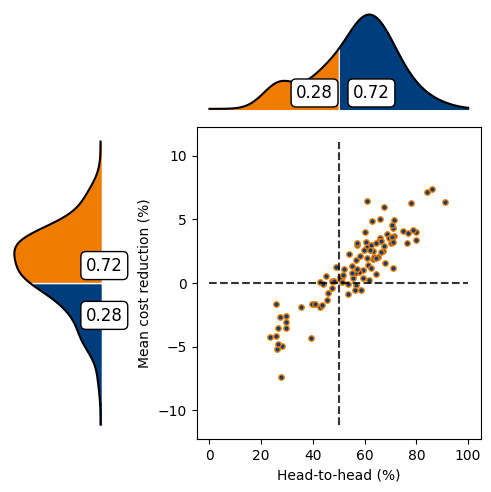

In [11]:
figure_name = DataPath + "DDR_vs_OLS"
regret_h2h.figure_plot_upleft(win_ratio_ddr_ols_wo_noise*100,regret_reduction_ddr_ols_wo_noise*100,figure_name)

In [ ]:
mu = mu_all[0]
lamb = lamb_all[0]
win_ratio_ddr_ols_with_noise = np.zeros(iters); cost_reduction_ddr_ols_with_noise = np.zeros(iters); regret_reduction_ddr_ols_with_noise = np.zeros(iters)
win_ratio_ddr_lasso_with_noise = np.zeros(iters); cost_reduction_ddr_lasso_with_noise = np.zeros(iters); regret_reduction_ddr_lasso_with_noise = np.zeros(iters)
win_ratio_ddr_ridge_with_noise = np.zeros(iters); cost_reduction_ddr_ridge_with_noise = np.zeros(iters); regret_reduction_ddr_ridge_with_noise = np.zeros(iters)
win_ratio_ddr_spo_with_noise = np.zeros(iters); cost_reduction_ddr_spo_with_noise = np.zeros(iters); regret_reduction_ddr_spo_with_noise = np.zeros(iters)
for i in range(iters):
    lbel, win_ratio_ddr_ols_with_noise[i], cost_reduction_ddr_ols_with_noise[i], regret_reduction_ddr_ols_with_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_with_noise_all[i,mu,lamb],cost_OLS_with_noise_all[i],cost_Oracle_with_noise_all[i])
    lbel, win_ratio_ddr_lasso_with_noise[i], cost_reduction_ddr_lasso_with_noise[i], regret_reduction_ddr_lasso_with_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_with_noise_all[i,mu,lamb],cost_Lasso_with_noise_all[i],cost_Oracle_with_noise_all[i])
    lbel, win_ratio_ddr_ridge_with_noise[i], cost_reduction_ddr_ridge_with_noise[i], regret_reduction_ddr_ridge_with_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_with_noise_all[i,mu,lamb],cost_Ridge_with_noise_all[i],cost_Oracle_with_noise_all[i])
    lbel, win_ratio_ddr_spo_with_noise[i], cost_reduction_ddr_spo_with_noise[i], regret_reduction_ddr_spo_with_noise[i] = ddr_eva.cross_compare2plus(cost_DDR_with_noise_all[i,mu,lamb],cost_SPO_with_noise_all[i],cost_Oracle_with_noise_all[i])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


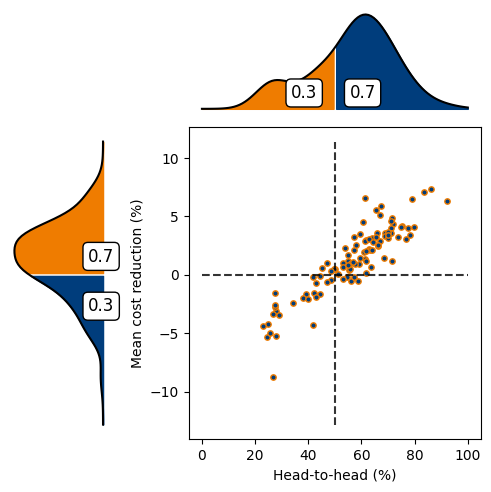

In [14]:
figure_name = DataPath + "DDR_vs_OLS_with_noise"
regret_h2h.figure_plot_upleft(win_ratio_ddr_ols_with_noise*100,regret_reduction_ddr_ols_with_noise*100,figure_name)